In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm


In [11]:
failMachine = pd.read_csv('Machine Failure Prediction using Sensor data.csv')
failMachine


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [12]:
X = failMachine.loc[:,~failMachine.columns.isin (['fail'])]
y = failMachine['fail']


In [58]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = pd.DataFrame(sc.fit_transform(Xtrain),index=Xtrain.index, columns=Xtrain.columns)
Xtest = pd.DataFrame(sc.fit_transform(Xtest),index=Xtest.index, columns=Xtest.columns)


In [15]:
modelo = svm.SVC()
modelo.fit(X=Xtrain,y=ytrain)
modelo.score(Xtest,ytest) 

0.9049295774647887

In [16]:
from sklearn.model_selection import StratifiedKFold
param_grid = {
    "C": np.linspace(0.01,100,100),
    "gamma": np.linspace(0.01,1,10),
    "kernel":['rbf', 'linear', 'sigmoid']
}

kfold = StratifiedKFold(n_splits=3,shuffle=True)

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv = kfold,
                           verbose=3
                           )
grid_result = grid_search.fit(Xtrain,ytrain)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


In [18]:
print(grid_result.best_params_)
print(grid_result.best_score_)
print(grid_result.score(Xtest,ytest))

{'C': np.float64(1.02), 'gamma': np.float64(0.23), 'kernel': 'rbf'}
0.9060606060606061
0.9014084507042254


In [19]:
modelobest = svm.SVC(C=0.01,gamma= 0.23,kernel='sigmoid')
modelobest.fit(Xtrain,ytrain)
modelobest.score(Xtest,ytest)

0.9190140845070423

In [25]:
import pygad
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Função de fitness para otimização dos parâmetros com k-fold
def fitness_function(ga_instance, solution, solution_idx):
    C, gamma = solution
    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    
    # Validando a performance do modelo usando validação cruzada k-fold
    scores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring='accuracy')  # cv=5 para k-fold
    return np.mean(scores),  # Retorna uma tupla (PyGAD exige isso)



In [26]:
# Definindo a estrutura do algoritmo genético
def run_ga():
    sol_per_pop = 10  # Número de soluções na população
    num_genes = 2  # Número de parâmetros: C e gamma

    # Definir o intervalo para C e gamma
    gene_space = [{'low': 0.1, 'high': 1000},  # C
                  {'low': 0.001, 'high': 1}]  # gamma

    # Inicializando o PyGAD
    ga_instance = pygad.GA(num_generations=10,
                           num_parents_mating=5,  # número de pais para a reprodução
                           sol_per_pop=sol_per_pop,  # soluções por população
                           num_genes=num_genes,  # número de parâmetros
                           gene_space=gene_space,  # intervalo de valores para cada gene
                           fitness_func=fitness_function,  # função de fitness
                           crossover_type="uniform",  # tipo de crossover
                           crossover_probability=0.8,  # probabilidade de crossover
                           mutation_type="random",  # tipo de mutação
                           mutation_probability=0.2,  # probabilidade de mutação
                           parent_selection_type="tournament",  # seleção dos pais
                           keep_parents=1)  # número de pais a serem mantidos

    # Executando a otimização
    ga_instance.run()

    # Acompanhando o progresso por geração
    for generation in range(ga_instance.num_generations):
        best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
        print(f"Geração {generation + 1} - Melhor fitness: {best_solution_fitness}")
        print(f"Melhor C: {best_solution[0]}, Melhor Gamma: {best_solution[1]}")

    # Obtendo os melhores parâmetros
    best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
    best_C, best_gamma = best_solution
    print(f'Melhor C final: {best_C}, Melhor Gamma final: {best_gamma}')
    return best_C, best_gamma

In [27]:
best_C, best_gamma = run_ga()


Geração 1 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 2 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 3 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 4 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 5 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 6 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 7 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 8 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 9 - Melhor fitness: [0.90454545]
Melhor C: 54.506794107277216, Melhor Gamma: 0.01670142704857838
Geração 10 - Melhor fitness: [0.90454545]
Melhor C: 54.

In [42]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

# Treinar o modelo SVM com os melhores parâmetros
svm_optimized = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
svm_optimized.fit(Xtrain, ytrain)

# Avaliação no conjunto de teste
y_pred_optimized = svm_optimized.predict(Xtest)
accuracy_optimized = accuracy_score(ytest, y_pred_optimized)

modelo.score(Xtest,y_pred_optimized)

print(f'Acurácia otimizada: {accuracy_optimized:.4f}')
print(classification_report(ytest, y_pred_optimized, target_names=None))

Acurácia otimizada: 0.9155
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       154
           1       0.96      0.85      0.90       130

    accuracy                           0.92       284
   macro avg       0.92      0.91      0.91       284
weighted avg       0.92      0.92      0.91       284



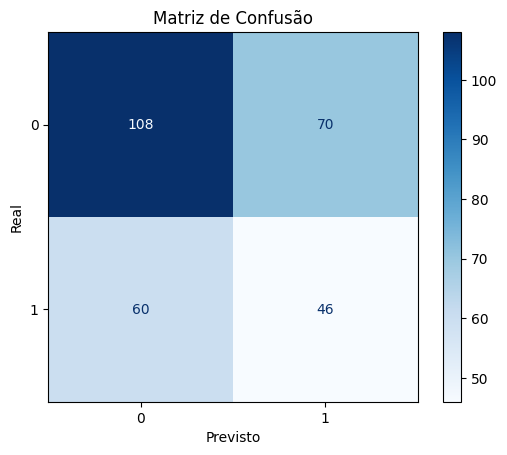

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(ytest, y_pred_optimized)

# Plotar a matriz de confusão com os labels do modelo
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_optimized.classes_)
disp.plot(cmap=plt.cm.Blues)

# Ajustar título e rótulos
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
